In [ ]:
### The following Airbnb activity is included in this Seattle dataset:

#### Listings, including full descriptions and average review score
#### Calendar, including listing id and the price and availability for that day

### This notebook is aimed to answer the following questions:

#### What are the busiest times of the year to visit Seattle? By how much do prices spike?
#### Which neighbors in Seatle have most of the Airbnb listings?
#### Can you describe the vibe of each Seattle neighborhood using listing descriptions?

In [1]:
import pandas as pd
import numpy as np
import plotly as py
from plotly.offline import iplot, plot, init_notebook_mode, download_plotlyjs
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.offline as offline

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
listing = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')

## What are the busiest times of the year to visit Seattle? By how much do prices spike?

In [4]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [3]:
calendar.groupby('listing_id').agg({'date': ['min', 'max']})
### the calendar table has a whole year data for all the listings (from 2016-01-04 to 2017-01-02)

date            
                   min         max
listing_id                        
3335        2016-01-04  2017-01-02
4291        2016-01-04  2017-01-02
5682        2016-01-04  2017-01-02
6606        2016-01-04  2017-01-02
7369        2016-01-04  2017-01-02
9419        2016-01-04  2017-01-02
9460        2016-01-04  2017-01-02
9531        2016-01-04  2017-01-02
9534        2016-01-04  2017-01-02
9596        2016-01-04  2017-01-02
10385       2016-01-04  2017-01-02
10695       2016-01-04  2017-01-02
11012       2016-01-04  2017-01-02
11411       2016-01-04  2017-01-02
13068       2016-01-04  2017-01-02
14386       2016-01-04  2017-01-02
15108       2016-01-04  2017-01-02
17951       2016-01-04  2017-01-02
19611       2016-01-04  2017-01-02
19619       2016-01-04  2017-01-02
19623       2016-01-04  2017-01-02
20868       2016-01-04  2017-01-02
20927       2016-01-04  2017-01-02
20928       2016-01-04  2017-01-02
23192       2016-01-04  2017-01-02
23356       2016-01-04  2017-01-02
23430       2016-01-04  2017-01-02
23919       2016-01-04  2017-01-02
24212       2016-01-04  2017-01-02
25002       2016-01-04  2017-01-02
...                ...         ...
10234558    2016-01-04  2017-01-02
10235014    2016-01-04  2017-01-02
10235136    2016-01-04  2017-01-02
10247453    2016-01-04  2017-01-02
10248139    2016-01-04  2017-01-02
10249527    2016-01-04  2017-01-02
10250735    2016-01-04  2017-01-02
10252110    2016-01-04  2017-01-02
10262971    2016-01-04  2017-01-02
10265391    2016-01-04  2017-01-02
10267360    2016-01-04  2017-01-02
10272763    2016-01-04  2017-01-02
10273158    2016-01-04  2017-01-02
10274175    2016-01-04  2017-01-02
10279830    2016-01-04  2017-01-02
10281965    2016-01-04  2017-01-02
10292753    2016-01-04  2017-01-02
10295151    2016-01-04  2017-01-02
10299108    2016-01-04  2017-01-02
10299195    2016-01-04  2017-01-02
10309898    2016-01-04  2017-01-02
10310373    2016-01-04  2017-01-02
10318171    2016-01-04  2017-01-02
10319529    2016-01-04  2017-01-02
10331249    2016-01-04  2017-01-02
10332096    2016-01-04  2017-01-02
10334184    2016-01-04  2017-01-02
10339144    2016-01-04  2017-01-02
10339145    2016-01-04  2017-01-02
10340165    2016-01-04  2017-01-02

[3818 rows x 2 columns]

In [6]:
## leverage those available prices in the calendar table to get the average price for each day

# remove $ sign on the price column and convert to numeric value
calendar['price'] = calendar['price'].apply(lambda x: str(x).replace('$',''))
calendar['price'] = pd.to_numeric(calendar['price'], errors = 'coerce')

df_calendar = calendar.groupby('date')[["price"]].sum()
df_calendar['mean'] = calendar.groupby('date')[["price"]].mean()
df_calendar['median'] = calendar.groupby('date')[["price"]].median()
df_calendar.columns = ['Total', 'Avg','Median']
df_calendar.head(10)

,Total,Avg,Median
date,,,
2016-01-04,211819.0,122.085879,99.0
2016-01-05,225312.0,120.681307,99.0
2016-01-06,220815.0,120.928258,99.0
2016-01-07,214823.0,120.958896,99.0
2016-01-08,227456.0,127.640853,100.0
2016-01-09,236326.0,127.330819,100.0
2016-01-10,241084.0,120.001991,99.0
2016-01-11,246497.0,118.565176,99.0
2016-01-12,249976.0,118.303833,99.0


In [ ]:
### How is the average price changing over the year?

In [7]:
#SET DATE AS INDEX
df_calendar2 = calendar.set_index("date")
df_calendar2.index = pd.to_datetime(df_calendar2.index)
df_calendar2 = df_calendar2[['price']].resample('M').mean()
df_calendar2.head()

,price
date,
2016-01-31,121.256898
2016-02-29,123.947429
2016-03-31,127.963804
2016-04-30,134.400282
2016-05-31,138.832159


In [9]:
trace = go.Scatter(
    x = df_calendar2.index[:-1],
    y = df_calendar2.price[:-1]
)
layout = go.Layout(
    title = "Average Prices by Month",
    xaxis = dict(title = 'Month'),
    yaxis = dict(title = 'Price ($)')
)
data = [trace]
figure = go.Figure(data = data, layout = layout)
offline.iplot(figure)

In [ ]:
## peak season for Seatle is the Summer time from June to Sep. 
## And monthly average price could peak to $151 per night.

## Which neighbors in Seattle have most of the Airbnb listings?

In [3]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

### Explore the listing dataset

In [13]:
df = listing[['id', 'name', 'space', 'description', 'neighborhood_overview', 'neighbourhood_cleansed']]

In [14]:
df.head()

,id,name,space,description,neighborhood_overview,neighbourhood_cleansed
0,241032,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,West Queen Anne
1,953595,Bright & Airy Queen Anne Apartment,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne
2,3308979,New Modern House-Amazing water view,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne
3,7421966,Queen Anne Chateau,NaN,A charming apartment that sits atop Queen Anne...,NaN,West Queen Anne
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,West Queen Anne


Text(0.5, 1.0, 'Number of Listings in Each Neighbourhood')

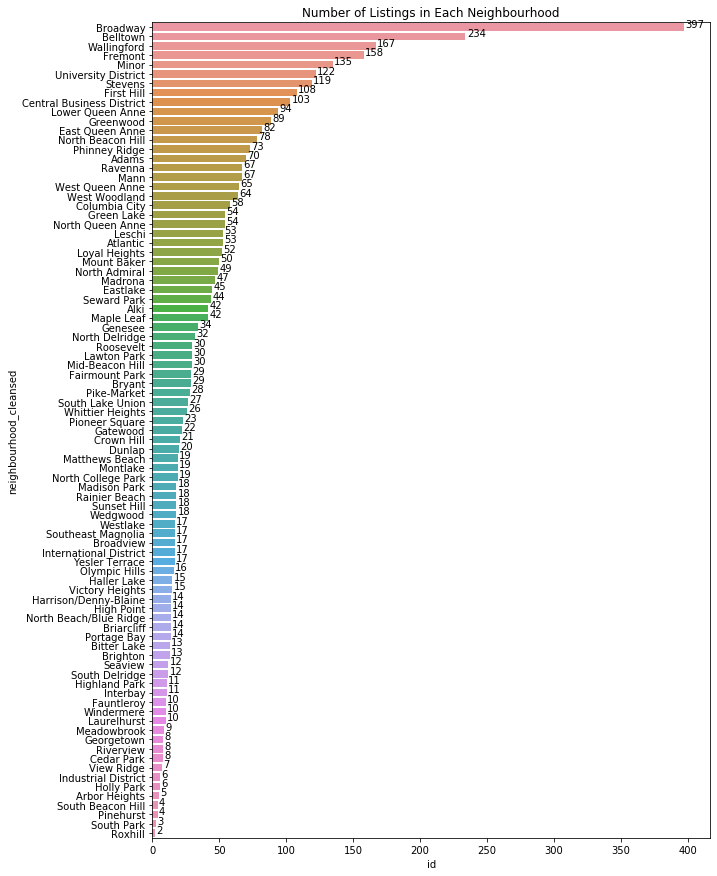

In [22]:
neighborRank = df.groupby(by='neighbourhood_cleansed').count()[['id']].sort_values(by='id', ascending=False)
# print(neighborRank)
plt.figure(figsize=(10,15))
g = sns.barplot(y=neighborRank.index,x=neighborRank["id"])
# The line below adds the value label in each bar
[g.text(p[1]+1,p[0],p[1], color='black') for p in zip(g.get_yticks(), neighborRank["id"])]
plt.title('Number of Listings in Each Neighbourhood')

In [ ]:
## As we can see from the chart above, there are many neighborhoods with Airbnb listing. 
## The top 3 neighborhoods are Broadway, Belltown and Wallingford.

## Can you describe the vibe of each Seattle neighborhood using listing descriptions?

In [39]:
#### The following codes use two ways to find out the key words/features of Seattle neighborhood.
#### Mainly focusing on the top 3 neighborhoods.

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from nltk import wordpunct_tokenize          
from nltk.stem import WordNetLemmatizer

In [25]:
# Natural language processing
import re
import string
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/sgong/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/sgong/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 1. Word Cloud

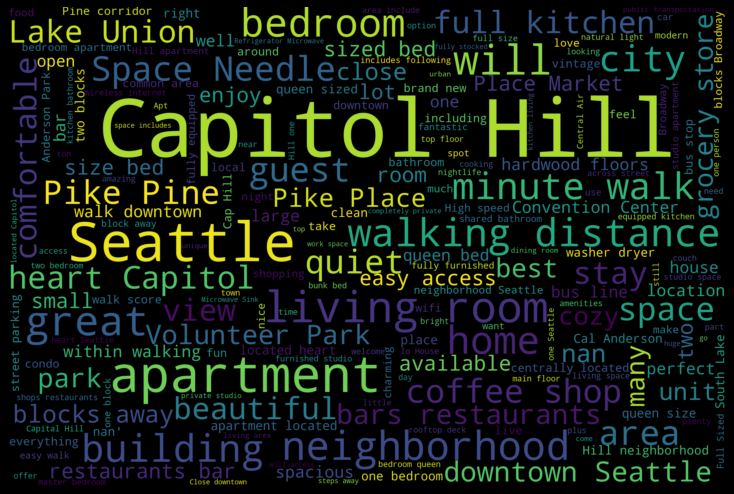

In [26]:
df_broadway = df[df['neighbourhood_cleansed'] == 'Broadway']
df_broadway_text = df_broadway['combined_description'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(df_broadway_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [ ]:
## we could see Capital Hill is very obvious in the word cloud of Broadway.

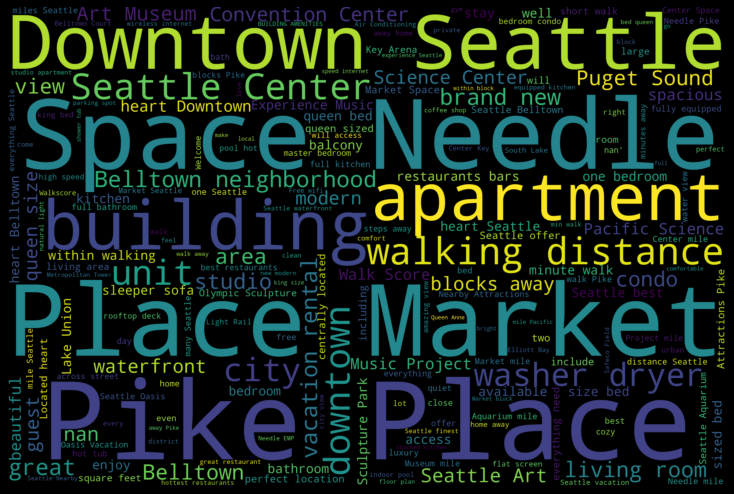

In [29]:
df_belltown = df[df['neighbourhood_cleansed'] == 'Belltown']
df_belltown_text = df_belltown['combined_description'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(df_belltown_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [ ]:
## As for neighborhood Belltown, Downtown Seattle, Space Needle, Pike Place take great position in the word cloud.

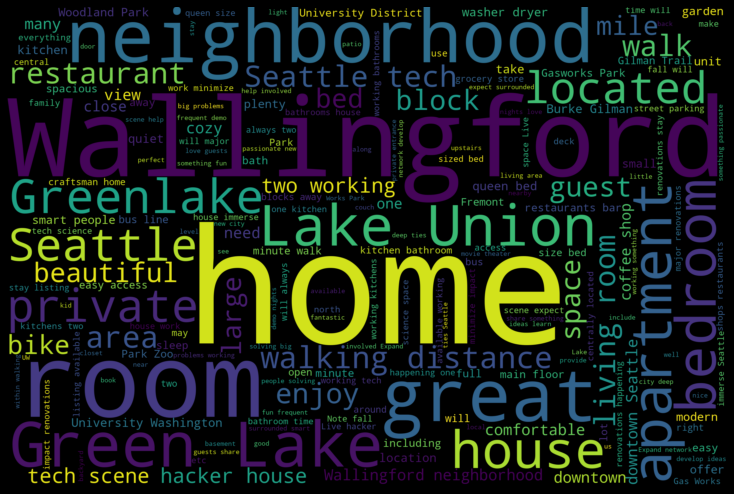

In [28]:
df_wallingford = df[df['neighbourhood_cleansed'] == 'Wallingford']
df_wallingford_text = df_wallingford['combined_description'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(df_wallingford_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [ ]:
# For Wallingford neighborhood, it seems to be tech center and Green lake is famous in this neighborhood.

### 2. TF-IDF

#### Function and class definitions

In [11]:
class LemmaTokenizer(object):
    """Custom tokenizer class that stems tokens"""
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in wordpunct_tokenize(doc) if len(t.strip()) > 1]
    
def show_topn(classifier, vectorizer, categories, n):
    """Returns the top n features that characterize each category"""
    feature_names = np.asarray(vectorizer.get_feature_names())
    for i, category in enumerate(categories):
        topn = np.argsort(classifier.coef_[i])[-n:] #argsort sorts in asc order
        print('{}: {}'.format(category, ", ".join(feature_names[topn])))

In [12]:
def save_topn(classifier,vectorizer,categories,n,outdict):
    """Returns the top n features that characterize eachc category, and save result in outdict"""
    feature_names = np.asarray(vectorizer.get_feature_names())
    for i, category in enumerate(categories):
        topn = np.argsort(classifier.coef_[i])[-n:]
        outdict[i] = feature_names[topn]

In [17]:
# Check the full text in each of the column
for i in range(len(df.columns)):
    print(df.columns[i],": ")
    print(df.iloc[0,i])
    print('=======================')

id : 
241032
name : 
Stylish Queen Anne Apartment
space : 
Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill.   This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV,  DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo.    The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a va

In [15]:
# combine the name, space, description, and neighborhood_overview into a new column
df['combined_description'] = df.apply(lambda x: '{} {} {} {}'.format(x['name'], x['space'], x['description'], x['neighborhood_overview']), axis=1)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [20]:
# Transform combined_description into tfidf format
tfidf = TfidfVectorizer(ngram_range=(1,2),stop_words='english',tokenizer=LemmaTokenizer())
tfidf.fit(df['combined_description'])
DescTfidf = tfidf.transform(df['combined_description'])

//anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.



In [31]:
pipeline = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,2), stop_words='english', tokenizer=LemmaTokenizer())),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3, random_state=42)),
])


le = LabelEncoder()

//anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.



In [37]:
# for the top 3 neighborhoods
new_target_3 = le.fit_transform(df[(df['neighbourhood_cleansed'] == 'Wallingford')|(df['neighbourhood_cleansed'] == 'Broadway')|(df['neighbourhood_cleansed'] == 'Belltown')]['neighbourhood_cleansed'])
model_3 = pipeline.fit(df[(df['neighbourhood_cleansed'] == 'Wallingford')|(df['neighbourhood_cleansed'] == 'Broadway')|(df['neighbourhood_cleansed'] == 'Belltown')]['combined_description'], new_target_3)

In [38]:
show_topn(model_3.named_steps['clf'], model_3.named_steps['tfidf'], le.inverse_transform(model_3.named_steps['clf'].classes_), 5)

Belltown: place market, center, place, pike place, belltown
Broadway: bar, broadway, capitol hill, capitol, hill
Wallingford: green, green lake, fremont, greenlake, wallingford


In [ ]:
### The key words got from TF-IDF for the top 3 neighborhoods are similar to the words got from WordCloud.

In [ ]:
new_target = le.fit_transform(df['neighbourhood_cleansed'])
model = pipeline.fit(df['combined_description'], new_target)

In [34]:
# for all the neighborhoods
show_topn(model.named_steps['clf'], model.named_steps['tfidf'], le.inverse_transform(model.named_steps['clf'].classes_), 5)

Adams: ballard ha, plum, lock, heart ballard, ballard
Alki: ..., water, alki beach, beach, alki
Arbor Heights: yard bathroom, beach super, treehouse yard, playroom, treehouse
Atlantic: self check, neighborhood easy, atlantic, international, international district
Belltown: vacation rental, heart belltown, vacation, belltown neighborhood, belltown
Bitter Lake: booked private, spencer, shared, shared just, dedicated
Briarcliff: block magnolia, discovery park, discovery, adu, magnolia
Brighton: new sheet, large friendly, light link, serene room, right light
Broadview: older quiet, home older, broadview, carkeek park, carkeek
Broadway: heart capitol, hill, capitol hill, capitol, broadway
Bryant: child, hospital, away burke, child hospital, bryant
Cedar Park: mess picture, tidy private, condo 16, 16 unit, mn
Central Business District: property located, step, step property, harbor, harbor step
Columbia City: light rail, heart columbia, city, columbia, columbia city
Crown Hill: north, greenwo